<a href="https://colab.research.google.com/github/shivamj2001/GitHub-TrendScraper/blob/main/GitHub%20TrendScraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Scrapping Top Repositories for Topics on GitHub**



## *  **Web Scraping**:
 is the process of extracting data from websites. It involves fetching the HTML content of a web page and then parsing it to extract the desired information. Web scraping can be done manually, but it's often automated using programming languages like Python.
## *   **Introduction to GitHub**:
GitHub is a web-based platform used for version control and collaboration on software development projects. It provides features like code hosting, version control using Git, project management, and collaboration tools. GitHub allows developers to store their code repositories, track changes, and collaborate with other developers through features like pull requests, issues, and wikis. It has become one of the most popular platforms for open-source projects and fosters a vibrant community of developers worldwide.



*   **Problem Statement**:
-> Scraping Top Repositories for Top 30 Topics on GitHub
The problem statement involves scraping the top repositories for the top 30 topics on GitHub. GitHub categorizes repositories under various topics, ranging from programming languages and frameworks to specific technologies and tools. The goal is to extract information about the top repositories for each of these topics, including details such as repository name, stars count, and URL. This information can be valuable for developers, researchers, and businesses to discover trending projects, analyze popular technologies, and stay updated with the latest developments in the software industry.
*  Objectives:
-> Scrape Data: Develop a web scraping script to extract information about the top repositories for each of the top 30 topics on GitHub.
-> Retrieve Repository Details: Extract details such as repository name, stars count, and URL for each scraped repository.
-> Customizable Interface: Provide a customizable interface to search for repositories based on topics and adjust parameters like the number of repositories to fetch.
-> Data Presentation: Present the scraped data in a structured format, such as a table or CSV file, for easy analysis and interpretation.


*   Benefits:
-> Insightful Analysis: Gain insights into trending projects, popular technologies, and community preferences on GitHub.
-> Resource Discovery: Discover valuable resources, libraries, and tools relevant to specific topics or domains.
-> Community Engagement: Foster collaboration and knowledge sharing within the developer community by highlighting noteworthy projects and contributions.

*  Tools used : Python, Requests, BeautifulSoup, pandas.







Here are the steps we'll follow:

*  We're going to scrape " https://github.com/topics "

*   We'll get a list of topics. For each topic, we'll get topic title, topic page URL and topic description

*   For each topic, we'll get the top 25 repositories in the topic from the topic page
*   For each Repositories, we'll grab the repo name, username, stars and repo URL


*   For each topic we'll create a CSV file in the following format :
   
   Repo Namee , Username , Stars , Repo URL
   three.js , mrdoob , 96700 , https://github.com/mrdoob/three.js

#Scrape the list of topics from Github
- use requests to download the page
- user BS4 to parse and extract information
- convert to a pandas dataframe

Let's write a function to download the page.

In [ ]:
def get_topic_page():
  # Download the page
  topic_url = 'https://github.com/topics'
  response = requests.get(topic_url)
  # Check successful response
  if response.status_code != 200:
       raise Exception('Failed to load page {}'.format(topic_url))
  # Parse using BeautifulSoup
  topic_doc = BeautifulSoup(response.text, 'html.parser')
  return topic_doc

- we have downloaded the page by request.get function and saved it in response file the content in the response file is html
- Then parsed the response text by BeautifulSoup using html.parser

In [ ]:
doc = get_topic_page()
doc.find('a')

<a class="px-2 py-4 color-bg-accent-emphasis color-fg-on-emphasis show-on-focus js-skip-to-content" href="#start-of-content">Skip to content</a>

## **Lets create some helper function to parse information from the page.**

##To get topic titles, we can pick p tags with the class ....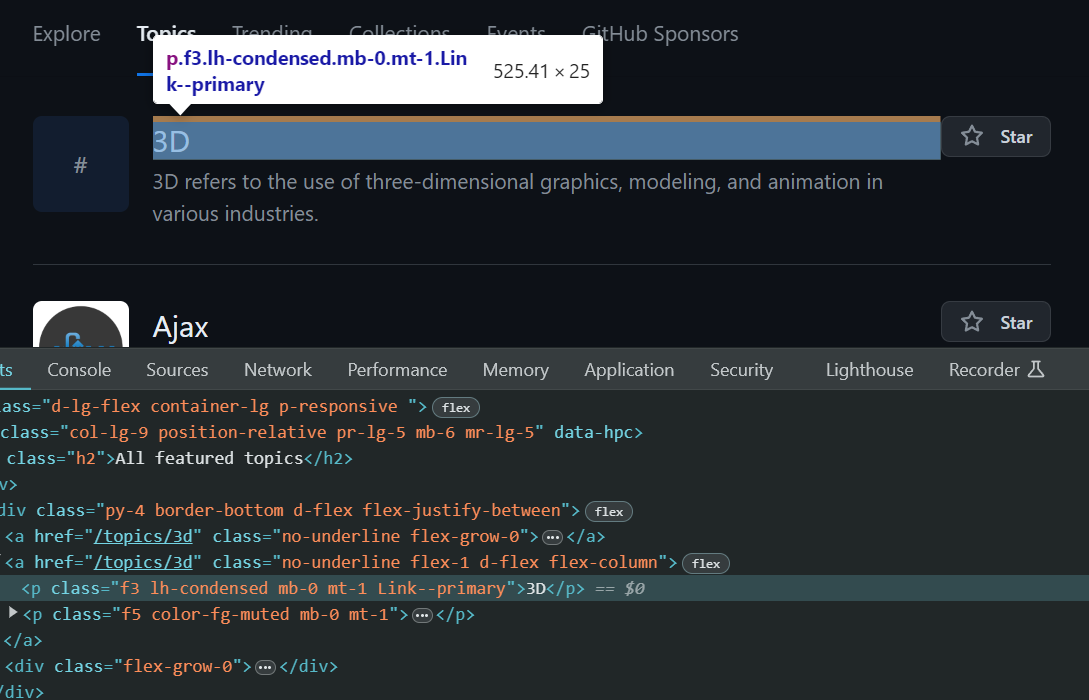




In [ ]:
def get_topic_titles(doc):

  topic_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
  topic_title_tags = doc.find_all('p', {'class': topic_class})
  topic_titles = []
  for tag in topic_title_tags:
    topic_titles.append(tag.text)
  return topic_titles

***get_topic_titles*** can be used to get the list of titles

In [ ]:
titles = get_topic_titles(doc)

In [ ]:
titles[:5]

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android']

First 5 titles

###Similarly we have defined functions for description and URL

In [ ]:


def get_topic_desc(doc):
    desc_class = 'f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class': desc_class})
    topic_desc = []
    for tag in topic_desc_tags:
       topic_desc.append(tag.text.strip())
    return topic_desc


def get_topic_urls(doc):
    link_class = 'no-underline flex-1 d-flex flex-column'
    link_title_tags = doc.find_all('a', {'class': link_class})
    topic_urls = []
    base_url = 'https://github.com'
    for tag in link_title_tags:
      topic_urls.append(base_url + tag['href'])
    return topic_urls

In [ ]:
desc = get_topic_desc(doc)
url = get_topic_urls(doc)

In [ ]:
desc[:3]

['3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.']

Top 3 description

In [ ]:
url[:3]

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm']

Top 3 URL's

Let's put this all together

In [ ]:
def scrape_topics():
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code != 200:
       raise Exception('Failed to load page {}'.format(topic_url))
    topics_dict = {
        'title': get_topic_titles(doc),
        'description': get_topic_desc(doc),
        'url': get_topic_urls(doc)
    }
    return pd.DataFrame(topics_dict)

## Putting it all together

- we have a function to get the list of topics
- We have a function to create a CSV file for scraped repos from a topic page
- Let's create the function to put them together

In [ ]:
def scrape_topics_repos():
    print('Scraping list of topics')
    topics_df = scrape_topics()

    os.makedirs('data', exist_ok=True)

    for index, row in topics_df.iterrows():
        print('Scrapping top repositories for "{}"' .format(row['title']))
        scrape_topic(row['url'], 'data/{}.csv'.format(row['title']))

We can check that the CSV's were created properly

#Explore the detailed code step by step in the below Part :

---



In [ ]:
import requests

In [ ]:
topic_url = 'https://github.com/topics'

In [ ]:
response = requests.get(topic_url)

In [ ]:
response.status_code

200

Status Code 200 means **Successful**

In [ ]:
len(response.text)

186197

In [ ]:
page_contents = response.text

In [ ]:
page_contents[:100]

'\n\n<!DOCTYPE html>\n<html\n  lang="en"\n  \n  data-color-mode="auto" data-light-theme="light" data-dark-t'

This is some html text that is extracted

In [ ]:
with open('webpage.html','w') as f:
    f.write(page_contents)

The above code is used to download the copy of the webpage(html content) into a filee called page_contents

## Now Beautiful Soup to parse and extract information

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
doc = BeautifulSoup(page_contents, 'html.parser')

This way we get our parser Document .doc is a BeautifulSoup object that contained all the parsed html content.

In [ ]:
p_tags = doc.find_all('p')

In [ ]:
len(p_tags)

69

Total P tags present in the parsed html text is 69

In [ ]:
p_tags[0:4]

[<p>We read every piece of feedback, and take your input very seriously.</p>,
 <p class="text-small color-fg-muted">
             To see all available qualifiers, see our <a class="Link--inTextBlock" href="https://docs.github.com/search-github/github-code-search/understanding-github-code-search-syntax">documentation</a>.
           </p>,
 <p class="f4 color-fg-muted col-md-6 mx-auto">Browse popular topics on GitHub.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         PHP
       </p>]

This is the first 4 P tags present

This is the class of the title tag found by inspecting the web page.

In [ ]:
topic_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
topic_title_tag = doc.find_all('p', {'class': topic_class})

In [ ]:
len(topic_title_tag)

30

In [ ]:
topic_title_tag[:4]

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>]

First 4 topics p tags

### Now we will follow same steps for extracting Discription tags

In [ ]:
desc_class = 'f5 color-fg-muted mb-0 mt-1'
desc_title_tag = doc.find_all('p', {'class': desc_class})

In [ ]:
len(desc_title_tag)

30

In [ ]:
desc_title_tag[:4]

[<p class="f5 color-fg-muted mb-0 mt-1">
           3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ajax is a technique for creating interactive web applications.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Algorithms are self-contained sequences that carry out a variety of tasks.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Amp is a non-blocking concurrency library for PHP.
         </p>]

We got the top 5 description tags.



### We will now extract the topic page url link.

In [ ]:
link_class = 'no-underline flex-1 d-flex flex-column'
link_title_tag = doc.find_all('a', {'class': link_class})

In [ ]:
len(link_title_tag)

30

Will give the list of top 30 titles of github

In [ ]:
topic_titles =[]

for tag in topic_title_tag:
   topic_titles.append(tag.text)

print(topic_titles)

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android', 'Angular', 'Ansible', 'API', 'Arduino', 'ASP.NET', 'Atom', 'Awesome Lists', 'Amazon Web Services', 'Azure', 'Babel', 'Bash', 'Bitcoin', 'Bootstrap', 'Bot', 'C', 'Chrome', 'Chrome extension', 'Command line interface', 'Clojure', 'Code quality', 'Code review', 'Compiler', 'Continuous integration', 'COVID-19', 'C++']


*   Below code Will give the list of top 30 titles's discription
of github.
*   strip() -> To remove any extra space.





In [ ]:
topic_desc =[]

for tag in desc_title_tag:
   topic_desc.append(tag.text.strip())

print(topic_desc[:2])

['3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.', 'Ajax is a technique for creating interactive web applications.']


*   Below code will give the list of top 30 titles's link of github.

In [ ]:
topic_url = []
base_url = 'https://github.com'

for tag in link_title_tag:
  topic_url.append(base_url + tag['href'])

print(topic_url)

['https://github.com/topics/3d', 'https://github.com/topics/ajax', 'https://github.com/topics/algorithm', 'https://github.com/topics/amphp', 'https://github.com/topics/android', 'https://github.com/topics/angular', 'https://github.com/topics/ansible', 'https://github.com/topics/api', 'https://github.com/topics/arduino', 'https://github.com/topics/aspnet', 'https://github.com/topics/atom', 'https://github.com/topics/awesome', 'https://github.com/topics/aws', 'https://github.com/topics/azure', 'https://github.com/topics/babel', 'https://github.com/topics/bash', 'https://github.com/topics/bitcoin', 'https://github.com/topics/bootstrap', 'https://github.com/topics/bot', 'https://github.com/topics/c', 'https://github.com/topics/chrome', 'https://github.com/topics/chrome-extension', 'https://github.com/topics/cli', 'https://github.com/topics/clojure', 'https://github.com/topics/code-quality', 'https://github.com/topics/code-review', 'https://github.com/topics/compiler', 'https://github.com/t


*  To convert all extracted info(topic name, desc and url's) into cse file we use pandas data frame.

*   Now we will make dictionary of all items and pass it into pandas data frame.



In [ ]:
topic_dict = {'title' : topic_titles, 'description' : topic_desc , 'link' : topic_url}

In [ ]:
import pandas as pd

topic_df = pd.DataFrame(topic_dict)

In [ ]:
topic_df[:5]

,title,description,link
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android


### To create CSV(s) file out of extracted info

In [ ]:
topic_df.to_csv('topics.csv', index = None)

## Getting information out of a topic page

In [ ]:
topic_page_url = topic_url[0]

In [ ]:
topic_page_url

'https://github.com/topics/3d'

In [ ]:
response = requests.get(topic_page_url)

In [ ]:
response.status_code

200

In [ ]:
topic_doc = BeautifulSoup(response.text, 'html.parser')

In [ ]:
h3_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
repo_tags = topic_doc.find_all('h3', {'class': h3_selection_class})

Repo tags contains the tags that contains user name and repo name

In [ ]:
a_tags = repo_tags[0].find_all('a')

First tag contain user name second conatains repo name

In [ ]:
a_tags[0].text.strip()

'mrdoob'

user name

In [ ]:
a_tags[1].text.strip()

'three.js'

Repo name

In [ ]:
base_url = 'https://github.com'
repo_url = base_url + a_tags[1]['href']
print(repo_url)

https://github.com/mrdoob/three.js


Repo url of user

Now we have to find the number of stars :

In [ ]:
star_class = 'Counter js-social-count'
star_tags = topic_doc.find_all('span', {'class': star_class})

In [ ]:
len(star_tags)

20

In [ ]:
star_tags[0].text

'97.8k'

In [ ]:
def parse_star_count(star_str):
    if star_str[-1] == 'k':
       return int(float(star_str[:-1]) * 1000)
    else:
       return int(star_str)

In [ ]:
parse_star_count(star_tags[0].text)

97800

In [ ]:
def get_repo_info(h3_tag, star_tag):
   # return all the required info about a repository
   a_tags = h3_tag.find_all('a')
   user_name = a_tags[0].text.strip()
   repo_name = a_tags[1].text.strip()
   repo_url = base_url + a_tags[1]['href']
   stars = parse_star_count(star_tag.text)
   return user_name, repo_name, repo_url, stars

In [ ]:
get_repo_info(repo_tags[0], star_tags[0])

('mrdoob', 'three.js', 'https://github.com/mrdoob/three.js', 97800)

In [ ]:
topic_repo_dict = {
    'username' : [],
    'repo_name' : [],
    'stars' : [],
    'repo_url' : []
}


for i in range(len(repo_tags)):
  repo_info = get_repo_info(repo_tags[i], star_tags[i])
  topic_repo_dict['username'].append(repo_info[0])
  topic_repo_dict['repo_name'].append(repo_info[1])
  topic_repo_dict['repo_url'].append(repo_info[2])
  topic_repo_dict['stars'].append(repo_info[3])


In [ ]:
topic_repo_dict

{'username': ['mrdoob',
  'pmndrs',
  'libgdx',
  'BabylonJS',
  'ssloy',
  'FreeCAD',
  'lettier',
  'aframevr',
  'CesiumGS',
  'blender',
  'MonoGame',
  'isl-org',
  'metafizzy',
  'timzhang642',
  'nerfstudio-project',
  'a1studmuffin',
  'domlysz',
  'FyroxEngine',
  'google',
  'openscad'],
 'repo_name': ['three.js',
  'react-three-fiber',
  'libgdx',
  'Babylon.js',
  'tinyrenderer',
  'FreeCAD',
  '3d-game-shaders-for-beginners',
  'aframe',
  'cesium',
  'blender',
  'MonoGame',
  'Open3D',
  'zdog',
  '3D-Machine-Learning',
  'nerfstudio',
  'SpaceshipGenerator',
  'BlenderGIS',
  'Fyrox',
  'model-viewer',
  'openscad'],
 'stars': [97800,
  25400,
  22500,
  22100,
  19000,
  17000,
  16800,
  16100,
  11600,
  11000,
  10600,
  10200,
  10200,
  9400,
  8100,
  7600,
  7100,
  7000,
  6400,
  6300],
 'repo_url': ['https://github.com/mrdoob/three.js',
  'https://github.com/pmndrs/react-three-fiber',
  'https://github.com/libgdx/libgdx',
  'https://github.com/BabylonJS/Babyl

In [ ]:
topic_repo_df = pd.DataFrame(topic_repo_dict)

This is the 30 Top repository for the Topic = "3D"

In [ ]:
topic_repo_df

,username,repo_name,stars,repo_url
0,mrdoob,three.js,97800,https://github.com/mrdoob/three.js
1,pmndrs,react-three-fiber,25400,https://github.com/pmndrs/react-three-fiber
2,libgdx,libgdx,22500,https://github.com/libgdx/libgdx
3,BabylonJS,Babylon.js,22100,https://github.com/BabylonJS/Babylon.js
4,ssloy,tinyrenderer,19000,https://github.com/ssloy/tinyrenderer
5,FreeCAD,FreeCAD,17000,https://github.com/FreeCAD/FreeCAD
6,lettier,3d-game-shaders-for-beginners,16800,https://github.com/lettier/3d-game-shaders-for...
7,aframevr,aframe,16100,https://github.com/aframevr/aframe
8,CesiumGS,cesium,11600,https://github.com/CesiumGS/cesium
9,blender,blender,11000,https://github.com/blender/blender


Now we have to do it for all the topics

# **Final code**

In [ ]:
import os

def get_topic_page(topic_url):
  # Download the page
  response = requests.get(topic_url)
  # Check successful response
  if response.status_code != 200:
       raise Exception('Failed to load page {}'.format(topic_url))
  # Parse using BeautifulSoup
  topic_doc = BeautifulSoup(response.text, 'html.parser')
  return topic_doc

def get_repo_info(h1_tag, star_tag):

   # Return all the required info about a respository

   a_tags = h1_tag.find_all('a')
   username = a_tags[0].text.strip()
   repo_name = a_tags[1].text.strip()
   repo_url = base_url + a_tags[1]['href']
   stars = parse_star_count(star_tag.text.strip())
   return username, repo_name, stars, repo_url


def get_topic_repos(topic_doc):

   # Get the h1 tags containing repo title, repo URL and username

    h3_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
    repo_tags = topic_doc.find_all('h3', {'class': h3_selection_class})

    # Get star tags

    star_class = 'Counter js-social-count'
    star_tags = topic_doc.find_all('span', {'class': star_class})

    topic_repos_dict = {
        'username' : [],
        'repo_name' : [],
        'stars' : [],
        'repo_url' : []
    }

    # Get repo info

    for i in range(len(repo_tags)):
      repo_info = get_repo_info(repo_tags[i],star_tags[i])
      topic_repos_dict['username'].append(repo_info[0])
      topic_repos_dict['repo_name'].append(repo_info[1])
      topic_repos_dict['stars'].append(repo_info[2])
      topic_repos_dict['repo_url'].append(repo_info[3])


    return pd.DataFrame(topic_repos_dict)


def scrape_topic(topic_url, path):
  if os.path.exists( path):
      print("The file {} already exists. Skipping...".format( path))
      return
  topic_df = get_topic_repos(get_topic_page(topic_url))
  topic_df.to_csv( path , index=None)


In [ ]:
# Suppose let's get the example of topic 4

url4 = topic_url[4]
print(url4)

https://github.com/topics/android


In [ ]:
topic4_doc = get_topic_page(url4)

In [ ]:
topic4_repos = get_topic_repos(topic4_doc)

In [ ]:
topic4_repos.to_csv('android.csv', index = None)


### Write a single function to :
1. Get the list of topics from the topics page.
2. Get the list of top repos from the individual topic pages
3. For each topic, create a CSV of the top repos for the topic




In [ ]:
def get_topic_titles(doc):

  topic_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
  topic_title_tags = doc.find_all('p', {'class': topic_class})
  topic_titles = []
  for tag in topic_title_tags:
    topic_titles.append(tag.text)
  return topic_titles


def get_topic_desc(doc):
    desc_class = 'f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class': desc_class})
    topic_desc = []
    for tag in topic_desc_tags:
       topic_desc.append(tag.text.strip())
    return topic_desc


def get_topic_urls(doc):
    link_class = 'no-underline flex-1 d-flex flex-column'
    link_title_tags = doc.find_all('a', {'class': link_class})
    topic_urls = []
    base_url = 'https://github.com'
    for tag in link_title_tags:
      topic_urls.append(base_url + tag['href'])
    return topic_urls


def scrape_topics():
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code != 200:
       raise Exception('Failed to load page {}'.format(topic_url))
    topics_dict = {
        'title': get_topic_titles(doc),
        'description': get_topic_desc(doc),
        'url': get_topic_urls(doc)
    }
    return pd.DataFrame(topics_dict)


In [ ]:
scrape_topics()

,title,description,url
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source platform for buildin...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


In [ ]:
def scrape_topics_repos():
    print('Scraping list of topics')
    topics_df = scrape_topics()

    os.makedirs('data', exist_ok=True)

    for index, row in topics_df.iterrows():
        print('Scrapping top repositories for "{}"' .format(row['title']))
        scrape_topic(row['url'], 'data/{}.csv'.format(row['title']))

In [ ]:
scrape_topics_repos()

Scraping list of topics
Scrapping top repositories for "3D"
Scrapping top repositories for "Ajax"
Scrapping top repositories for "Algorithm"
Scrapping top repositories for "Amp"
Scrapping top repositories for "Android"
Scrapping top repositories for "Angular"
Scrapping top repositories for "Ansible"
Scrapping top repositories for "API"
Scrapping top repositories for "Arduino"
Scrapping top repositories for "ASP.NET"
Scrapping top repositories for "Atom"
Scrapping top repositories for "Awesome Lists"
Scrapping top repositories for "Amazon Web Services"
Scrapping top repositories for "Azure"
Scrapping top repositories for "Babel"
Scrapping top repositories for "Bash"
Scrapping top repositories for "Bitcoin"
Scrapping top repositories for "Bootstrap"
Scrapping top repositories for "Bot"
Scrapping top repositories for "C"
Scrapping top repositories for "Chrome"
Scrapping top repositories for "Chrome extension"
Scrapping top repositories for "Command line interface"
Scrapping top repositori